In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec

import plot_utils

In [2]:
# Now plot the data
filenames, columns, labels = plot_utils.get_plot_info()
print(filenames)

['graphs/results-256-30-int32.csv', 'graphs/results-256-10-int32.csv', 'graphs/results-1024-10-int32.csv']


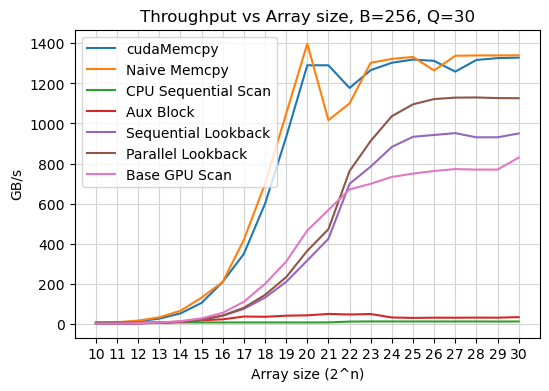

In [3]:
df = plot_utils.load_experiment_data(filenames[0])
plot_utils.plot_experiment_data(df, columns, labels,
                                title="Throughput vs Array size, B=256, Q=30",
                                filename="../plots/throughput_vs_array_size_B256_Q30.png")

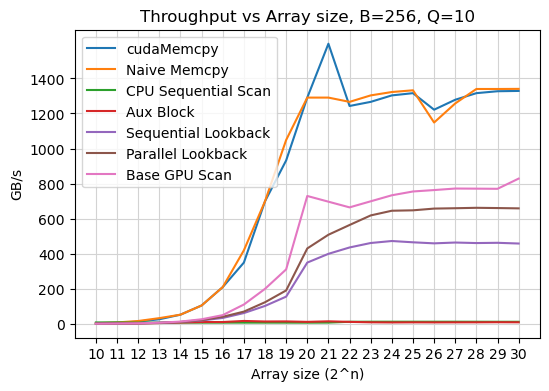

In [4]:
df = plot_utils.load_experiment_data(filenames[1])
plot_utils.plot_experiment_data(df, columns, labels,
                                title="Throughput vs Array size, B=256, Q=10",
                                filename="../plots/throughput_vs_array_size_B256_Q10.png")

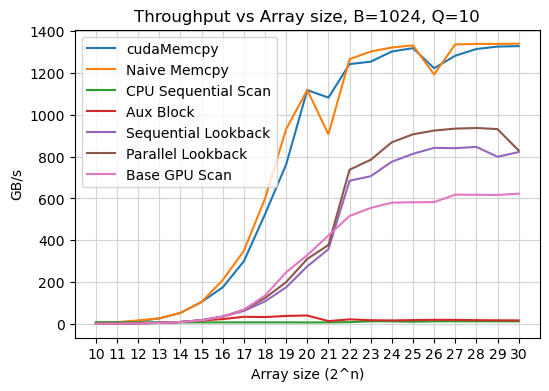

In [5]:
df = plot_utils.load_experiment_data(filenames[2])
plot_utils.plot_experiment_data(df, columns, labels,
                                title="Throughput vs Array size, B=1024, Q=10",
                                filename="../plots/throughput_vs_array_size_B1024_Q10.png")

In [6]:
filenames = plot_utils.get_heatmap_filenames()
data = plot_utils.load_heatmap_data(filenames, skip_every_second_n=True)
bs, qs, ns = plot_utils.get_BQN_values(skip_every_second_n=True)

In [7]:
max_val = data.max()
# Find indices of max value
max_idx = np.where(data == max_val)
max_idx = [x[0] for x in max_idx]
max_bqn = (bs[max_idx[0]], qs[max_idx[1]], ns[max_idx[2]])
print("Max value: {} at B={}, Q={}, N={}".format(max_val, *max_bqn))

Max value: 1133.46 at B=256, Q=30, N=30


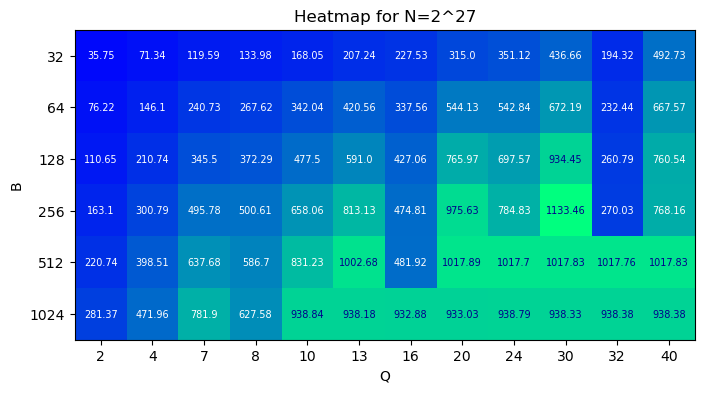

In [11]:
plot_utils.plot_heatmap(data, ("Q", "B"), N=30, bqn_values=(bs, qs, ns),
                        title="Heatmap for N=2^27",
                        clim=(0, 1133.46),
                        filename="../plots/heatmap_BvQ_N=28.png")

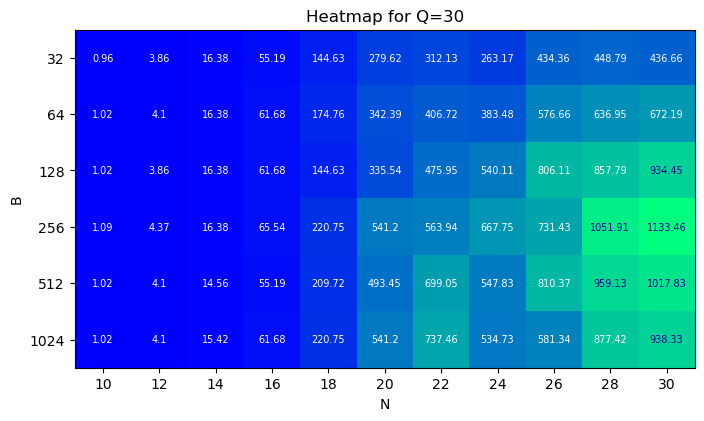

In [12]:
plot_utils.plot_heatmap(data, ("N", "B"), Q=30, bqn_values=(bs, qs, ns),
                        title="Heatmap for Q=30",
                        clim=(0, 1133.46),
                        figsize=(10, 5),
                        filename="../plots/heatmap_BvN_Q=30.png")

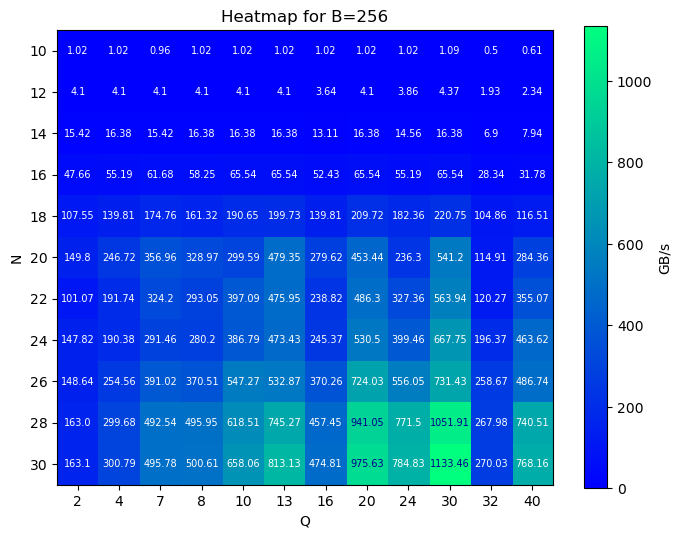

In [13]:
plot_utils.plot_heatmap(data, ("Q", "N"), B=256, bqn_values=(bs, qs, ns),
                        title="Heatmap for B=256",
                        clim=(0, 1133.46),
                        filename="../plots/heatmap_QvN_B=256.png",
                        colorbar=True)